In [1]:
import pandas as pd
import json
import functools
import emoji
import functools
import operator
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
data_id  = pd.read_csv('./data/data_identification.csv')
emo = pd.read_csv('./data/emotion.csv')

tweets_str = open('./data/tweets_DM.json').read()
tweets_str = "[" + tweets_str.replace("}\n{", "}\n,{") + "]"
tweets = json.loads(tweets_str)

In [3]:
tweet_df = pd.DataFrame(tweets[:100000])
source = pd.DataFrame(list(tweet_df._source.apply(lambda x: x['tweet']).values))
tweet_df = pd.concat([tweet_df, source], axis=1).drop(['_source','_type','_index'], axis=1)

In [4]:
tweet_df

,_score,_crawldate,hashtags,tweet_id,text
0,391,2015-05-23 11:42:47,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be dehydrated. Cuz man.... that's <LH>"
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy. #CNN"
2,232,2017-12-25 04:39:20,[bibleverse],0x28b412,"Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>"
3,376,2016-01-24 23:53:05,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,2016-01-08 17:18:59,[],0x2de201,"""Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake."" ~ Christopher Hitchens <LH> <LH>"
...,...,...,...,...,...
99995,70,2016-02-10 13:23:11,[],0x2dbdcd,@HiltonEtwallSNT @DerbyshireFRS Will this nightmare never end <LH> councillor
99996,505,2017-03-09 19:17:26,[],0x2c68cb,Binge watched @netflix's @friendsfcollege It was so hilarious.I didn't want it to end.Can't believe pretty much every critic hated it.#loved
99997,599,2015-09-10 23:27:16,[],0x2f53c6,how did I cope all day in in work yesterday with less then 3 hours sleep <LH>
99998,505,2016-02-27 03:26:45,[Tlou],0x2485ba,"#Tlou x2 +100% rises, 3.5p - 10p+, now 6.2p - 14.5p. <LH> performance from this share."


In [5]:
import seaborn as sns

# sns.distplot(tweet_df._score % 100)

In [6]:
tweet_df = tweet_df.merge(data_id, left_on='tweet_id', right_on='tweet_id')
tweet_df = tweet_df.merge(emo, how='left')

In [7]:
tweet_df.text = tweet_df.text.str.replace('<LH>', '')
tweet_df.text = tweet_df.text.apply(emoji.get_emoji_regexp().split).apply(" ".join)

In [8]:
import string

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

tweet_df.text = tweet_df.text.apply(clean_text)

In [9]:
# import numpy as np
# from sklearn.preprocessing import MultiLabelBinarizer

# hashtag_threshold = 200

# mlb = MultiLabelBinarizer()
# add_tag = np.vectorize(lambda x: f"hashtag_{x}")
# hashtags = pd.DataFrame(mlb.fit_transform(tweet_df.hashtags), columns=add_tag(mlb.classes_))
# hashtag_freq = hashtags.sum(axis=0).sort_values(ascending=False)
# hashtags = hashtags.filter(hashtag_freq.iloc[:hashtag_threshold].index)

# tweet_df = pd.concat([tweet_df, hashtags], axis=1).drop('hashtags', axis=1)

In [10]:
train_df = tweet_df[tweet_df.identification == 'train'].drop('identification', axis=1)
test_df = tweet_df[tweet_df.identification == 'test'].drop(['identification', 'emotion'], axis=1)

In [11]:
print(train_df.shape)
print(test_df.shape)

(78187, 6)
(21813, 5)


In [12]:
train_df.head()

,_score,_crawldate,hashtags,tweet_id,text,emotion
0,391,2015-05-23 11:42:47,[Snapchat],0x376b20,people who post add me on snapchat must be dehydrated cuz man thats,anticipation
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]",0x2d5350,brianklaas as we see trump is dangerous to freepress around the world what a trumplegacy cnn,sadness
3,376,2016-01-24 23:53:05,[],0x1cd5b0,now issa is stalking tasha 😂 😂 😂,fear
5,120,2015-06-11 04:44:05,"[authentic, LaughOutLoud]",0x1d755c,riskshow thekevinallison thx for the best time tonight what stories heartbreakingly authentic laughoutloud good,joy
6,1021,2015-08-18 02:30:07,[],0x2c91a8,still waiting on those supplies liscus,anticipation


In [13]:
tweet_df.text

0                                                                        people who post add me on snapchat must be dehydrated cuz man thats
1                                               brianklaas as we see trump is dangerous to freepress around the world what a trumplegacy cnn
2                               confident of your obedience i write to you knowing that you will do even more than i ask philemon bibleverse
3                                                                                                           now issa is stalking tasha 😂 😂 😂
4                     trust is not the same as faith a friend is someone you trust putting faith in anyone is a mistake christopher hitchens
                                                                        ...                                                                 
99995                                                                 hiltonetwallsnt derbyshirefrs will this nightmare never end councillor
99996    bing

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tweet_tokenizer = nltk.tokenize.casual.TweetTokenizer(strip_handles=True, reduce_len=True)
# build analyzers (td-idf)
TDIDF_1000 = TfidfVectorizer(
    max_features=10000,
#     ngram_range=(1,3),
    tokenizer=tweet_tokenizer.tokenize, 
    stop_words='english', 
    lowercase=True,
    strip_accents='unicode'
) 

# apply analyzer to training data
TDIDF_1000 = TDIDF_1000.fit(train_df['text'])

/Users/manu/data_mining/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [15]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(TDIDF_1000.transform(train_df['text']), train_df['emotion'], shuffle=False)

# class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
print('----------------------------')

X_train.shape:  (58640, 10000)
y_train.shape:  (58640,)
X_test.shape:  (19547, 10000)
y_test.shape:  (19547,)
----------------------------


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

def train_and_eval(model, X_tr, X_te, y_tr, y_te, **params):
    model = model(
        **params, 
        class_weight='balanced')\
    .fit(
        X=X_train.toarray(), 
        y=y_train
    )

    y_train_pred = model.predict(X_train.toarray())
    y_test_pred = model.predict(X_test.toarray())

    acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

    print(model)
    print('training accuracy: {}'.format(round(acc_train, 2)))
    print('testing accuracy: {}'.format(round(acc_test, 2)))
    print('----------------------------')
    print(classification_report(y_true=y_test, y_pred=y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))
    
    return model

DecisionTreeClassifier(class_weight='balanced')
training accuracy: 0.98
testing accuracy: 0.39
----------------------------
              precision    recall  f1-score   support

       anger       0.17      0.21      0.19       509
anticipation       0.42      0.41      0.42      3354
     disgust       0.25      0.25      0.25      1856
        fear       0.30      0.33      0.31       847
         joy       0.53      0.50      0.51      6957
     sadness       0.35      0.35      0.35      2563
    surprise       0.15      0.18      0.16       643
       trust       0.29      0.30      0.30      2818

    accuracy                           0.39     19547
   macro avg       0.31      0.32      0.31     19547
weighted avg       0.39      0.39      0.39     19547



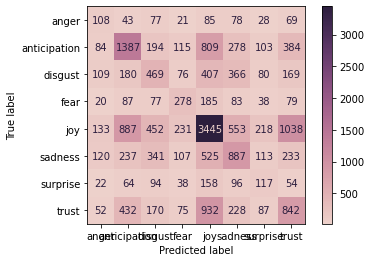

In [28]:
# train_and_eval(LogisticRegression, X_train, X_test, y_train, y_test)
# train_and_eval(MLPClassifier, X_train, X_test, y_train, y_test)
model = train_and_eval(model=DecisionTreeClassifier, X_tr=X_train, X_te=X_test, y_tr=y_train, y_te=y_test)
# train_and_eval(KNeighborsClassifier, X_train, X_test, y_train, y_test)
# train_and_eval(SVC, X_train, X_test, y_train, y_test)
# train_and_eval(GaussianProcessClassifier, X_train, X_test, y_train, y_test)
# model = train_and_eval(model=RandomForestClassifier, X_tr=X_train, X_te=X_test, y_tr=y_train, y_te=y_test)
# train_and_eval(AdaBoostClassifier, X_train, X_test, y_train, y_test)
# train_and_eval(GaussianNB, X_train, X_test, y_train, y_test)

In [18]:
tdidf = pd.DataFrame(data=X_train.toarray(), columns=TDIDF_1000.get_feature_names())

In [19]:
tdidf

,!,...,... ...,?,TM,aa,aaa,aaand,aaron,aaroncarter,aartiseocalibrefurniturecouk,ab,abandon,abandoned,abba,abc,abchouston,abide,abilities,ability,able,abortion,aboveonly,abraham,abroad,absence,absolute,absolutely,absurd,abt,abudhabi,abundance,abuse,abused,ac,aca,academy,acc,accent,accept,acceptable,acceptance,accepted,accepting,accepts,access,accessories,accident,accidentally,accidents,accomplish,accomplished,accomplishment,accomplishments,according,account,accounting,accounts,accurate,accused,ace,achieve,achieved,achievement,achievements,achieving,acid,acknowledge,aclu,acosta,acoustic,act,acted,acting,action,actions,activate,active,activities,activity,actor,actors,actorslife,actress,acts,actual,actually,actuary,ad,adam,adambombshow,adams,add,added,addict,addicted,addiction,adding,addition,additional,address,addressed,adds,admin,administration,admiration,admire,admit,admitted,adopt,adorable,adore,ads,adult,adulting,adults,advance,advanced,advantage,advent,adventure,adventures,adversity,advertising,advice,advise,advisor,advocate,aesthetic,aether,af,afc,affair,affairs,affect,affected,affection,affects,affirmation,afflicted,afford,afghanistan,afl,afp,afraid,africa,african,afternoon,age,aged,agencies,agency,agenda,agent,ages,agile,ago,agree,agreed,agreement,agt,ah,ahead,ahh,ahhh,ahs,ahscult,ahsfx,aid,aids,aim,aimed,ain,aint,air,aircanada,airline,airlines,airplane,airport,airtel,airtelindia,airtelpresence,aisle,aj,ak,aka,akita,al,alabama,alabamasenaterace,alan,alarm,alaska,albany,alberta,album,albums,alcohol,ale,alert,alex,alexa,alexablisswwe,alexander,algorithm,alhajitekno,alhamdulillah,ali,alice,alien,aliens,aligned,alike,alive,allah,allan,allegations,allen,allergic,allergy,alliance,allies,allin,alll,allow,allowed,allowing,allows,almighty,almond,alostteen,alot,alpha,alright,altar,alter,altered,alternative,altleft,altright,alumni,alyssamilano,ama,amarnath,amarnathyatra,amas,amateur,amazayn,amaze,...,👣,👦,👧,👨,👩,👪,👫,👬,👭,👯,👰,👱,👴,👵,👶,👸,👹,👻,👼,👽,👿,💀,💁,💃,💄,💅,💆,💇,💉,💊,💋,💌,💍,💎,💏,💐,💑,💒,💓,💔,💕,💖,💗,💘,💙,💚,💛,💜,💝,💞,💟,💡,💢,💣,💤,💥,💦,💧,💨,💩,💪,💫,💭,💯,💰,💵,💸,💻,💼,📌,📍,📑,📓,📕,📖,📚,📝,📦,📱,📸,📹,📺,📽,📿,🔊,🔐,🔑,🔜,🔝,🔥,🔫,🔮,🔴,🔵,🔶,🔷,🔸,🔹,🕆,🕇,🕉,🕊,🕘,🕯,🕵,🕷,🕺,🖒,🖕,🖖,🖤,🗣,🗽,😀,😁,😂,😃,😄,😅,😆,😇,😈,😉,😊,😋,😌,😍,😎,😏,😐,😑,😒,😓,😔,😕,😖,😗,😘,😙,😚,😛,😜,😝,😞,😟,😠,😡,😢,😣,😤,😥,😦,😧,😨,😩,😪,😫,😬,😭,😮,😯,😰,😱,😲,😳,😴,😵,😶,😷,😸,😹,😺,😻,😽,🙀,🙁,🙂,🙃,🙄,🙅,🙆,🙇,🙈,🙉,🙊,🙋,🙌,🙏,🚀,🚒,🚗,🚨,🚪,🚫,🚮,🚶,🛁,🛩,🛫,🤐,🤑,🤒,🤓,🤔,🤕,🤗,🤘,🤙,🤚,🤛,🤞,🤟,🤠,🤡,🤢,🤣,🤤,🤦,🤧,🤨,🤩,🤪,🤬,🤮,🤯,🤰,🤳,🤵,🤷,🤸,🥂,🥃,🥇,🥈,🥊,🥑,🥓,🥕,🥗,🥞,🦁,🦃,🦄,🦅,🦋,🦒,🧀,🧐,🧡,󠁧
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.434714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [20]:
s = tdidf.iloc[10]
s[s != 0]

butterflies    0.510375
butterfly      0.543939
know           0.257777
research       0.447170
text           0.420996
Name: 10, dtype: float64

In [21]:
s[s != 0].sum()

2.1802570211530874

In [22]:
tdidf.iloc[10]

!          0.0
...        0.0
... ...    0.0
?          0.0
TM         0.0
          ... 
🦒          0.0
🧀          0.0
🧐          0.0
🧡          0.0
󠁧          0.0
Name: 10, Length: 10000, dtype: float64

In [23]:
X_train.toarray()[10].sum()

2.1802570211530874

In [24]:
# train_df.text.str.replace('<LH>', '').iloc[10]

In [25]:
train_df.head()

,_score,_crawldate,hashtags,tweet_id,text,emotion
0,391,2015-05-23 11:42:47,[Snapchat],0x376b20,people who post add me on snapchat must be dehydrated cuz man thats,anticipation
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]",0x2d5350,brianklaas as we see trump is dangerous to freepress around the world what a trumplegacy cnn,sadness
3,376,2016-01-24 23:53:05,[],0x1cd5b0,now issa is stalking tasha 😂 😂 😂,fear
5,120,2015-06-11 04:44:05,"[authentic, LaughOutLoud]",0x1d755c,riskshow thekevinallison thx for the best time tonight what stories heartbreakingly authentic laughoutloud good,joy
6,1021,2015-08-18 02:30:07,[],0x2c91a8,still waiting on those supplies liscus,anticipation


In [26]:
feature_array = np.array(TDIDF_1000.get_feature_names())
tfidf_sorting = np.argsort(X_train.toarray()).flatten()[::-1]

n = 100
top_n = feature_array[tfidf_sorting][:n]

In [27]:
top_n

array(['happening', 'friend', '\U000e0067', 'gal', 'gambling', 'gallon',
       'gallery', 'galgadot', 'galaxy', 'galatians', 'gains', 'gameday',
       'gaining', 'gained', 'gain', 'gaia', 'gaga', 'gag', 'ga', 'game',
       'gamedev', 'fyi', 'gap', 'garybarlow', 'gary', 'garlic', 'gardens',
       'garden', 'garbage', 'garage', 'gang', 'gameofthones', 'ganesh',
       'gandhi', 'gaming', 'games', 'gamer', 'gameofthronesfinale',
       'gameofthrones', 'g', 'futures', 'fuzzy', 'fucking', 'fulfilling',
       'fulfilled', 'fulfill', 'fulfil', 'fuk', 'fuel', 'fucks', 'fuckin',
       'gas', 'fucker', 'fucken', 'fucked', 'fuck', 'fu', 'ft', 'fsu',
       'fulfillment', 'fullest', 'fullness', 'fully', 'future', 'futile',
       'fuss', 'fury', 'furniture', 'fur', 'funny', 'funniest', 'funk',
       'funds', 'funding', 'funder', 'fund', 'function', 'fun', 'garyvee',
       'gate', 'fry', 'georgiadirtroad', 'getspectrum', 'gets', 'getout',
       'getaway', 'gesture', 'germany', 'german', '